In [49]:
import numpy as np
from numpy import math
import pandas as pd
import scipy.stats as stats
from scipy.optimize import minimize


/var/folders/6v/f_975vxs321gq5chwxh9ccy40000gn/T/ipykernel_2757/420504124.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


# Ans 1.1

$\begin{aligned} p(\theta \mid x) & \propto p(x \mid \theta) p(\theta) \\ & \propto \exp \left(\frac{-(x-\theta)^2}{8}-\frac{\theta-5)^2}{18}\right) \\ & \propto \exp \left(\frac{-9(x-\theta)^2-4(\theta-5)^2}{72}\right) \\ & \propto \exp \left(-\frac{\left(\theta-\frac{74}{13}\right)^2}{2 \times \frac{36}{13}}\right)\end{aligned}$



$\Rightarrow \quad \theta \left\lvert\, x \sim N\left(\frac{74}{13}, \frac{36}{13}\right)\right.$


# Ans 1.2

$$
\begin{aligned}
& a=\frac{1}{9} \quad , b=\frac{n}{4} \quad , x=6   \\
& \mu_{\text {post }}=\frac{\frac{5}{9}+\frac{n}{4} \times 6}{\frac{9 n+4}{36}}=\frac{20+54 n}{9 n+4} \quad \begin{array}{l}
 \\

\end{array} \\
& \sigma_{\text {post }}^2=\frac{36}{4+9 n} \\
&
\end{aligned}
$$
$\Rightarrow \quad \theta \left\lvert\, x \sim N\left(\mu_{\text {post }}, \sigma_{\text {post }}^2\right)\right.$


# Ans 1.3

$\begin{aligned} & \mu_{\text {post }}=\frac{20+54n}{9 n+4}, \text { as } n \rightarrow \infty, \mu_{\text {post }} \rightarrow 6 . \\ & \sigma_{\text {post }}^2=\frac{36}{9 n+4}, \text { ass } n \rightarrow \infty, \sigma_{\text {post }}^2 \rightarrow 0 .\end{aligned}$


 As the mean tends to 6, and the variance tends to 0, the certainty of the parameter's true value increases.

# Ans 1.4.1


$\mu_{\text {post }}=\frac{\left(\frac{\mu_{\text {prior }}}{\sigma_{\text {prior }}^2}+\frac{n x}{\sigma_x^2}\right)}{\left(\frac{1}{\sigma_{\text {prior }}^2}+\frac{n}{\sigma_x^2}\right)}=\frac{\frac{100}{225}+\frac{80}{100}}{\frac{1}{225}+\frac{1}{100}}=86.15$

# Ans 1.4.2

$\mu_{\text {post }}=\frac{\left(\frac{\mu_{\text {prior }}}{\sigma_{\text {prior }}^2}+\frac{n x}{\sigma_x^2}\right)}{\left(\frac{1}{\sigma_{\text {prior }}^2}+\frac{n}{\sigma_x^2}\right)}=\frac{\frac{100}{225}+\frac{150}{100}}{\frac{1}{225}+\frac{1}{100}}=134.62$

# Ans 2


$\begin{aligned} & L(\mu, \sigma)=\prod_{i=1}^n \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(\frac{-\left(x_{i-\mu}\right)^2}{2 \sigma^2}\right) \\ & \log (L(\mu, \sigma))=\sum_{i=1}^n\left[\log \left(\frac{1}{\sqrt{2 \pi} \sigma}\right)-\frac{1}{2 \sigma^2}\left(x_i-\mu\right)^2\right] \\ & \Rightarrow l(\mu, \sigma)=-n \log (\sqrt{2 \pi} \sigma)-\frac{1}{2 \sigma^2} \sum_{i=1}^n\left(x_i-\mu\right)^2 \\ & \Rightarrow l(\mu, \sigma)=\frac{-n}{2} \log (2 \pi)-n \log (\sigma)-\frac{1}{2 \sigma^2} \sum_{i=1}^n\left(x_i-\mu\right)^2 \\ & \end{aligned}$

In [50]:


# Creating an array with random samples from a normal distribution with mean 18 and standard deviation 7.
sample = np.random.normal(18, 7, 1000)

def log_likelihood(x, mu, sigma):
    n = len(x)
    return -n * np.log(((2 * np.pi) ** 0.5) * sigma) - np.sum((x - mu) ** 2) / (2 * sigma ** 2)

def negative_log_likelihood(params, x):
    mu, sigma = params
    return -log_likelihood(x, mu, sigma)


initial_guess = [18, 7]


result = minimize(negative_log_likelihood, initial_guess, args=(sample))


print("Estimated mu: ",result.x[0])
print("Estimated sigma: ",result.x[1])





Estimated mu:  18.085489393075605
Estimated sigma:  7.1623785679818255


# Ans 3

$\begin{aligned} & \theta_{M A P}=\underset{\theta}{\arg \max }\left[\frac{1}{\sqrt{2 \pi} \sigma} \exp \left(\frac{-(\theta-\mu)^2}{2 \sigma^2}\right) \prod_{i=1}^n\left[\sigma\left(\theta^{\top} x_i\right)\right]^{y_i}\left[1-\sigma\left(\theta^{\top} x_i\right)\right]^{1-y_i}\right] \\ & =\underset{\theta}{\arg \max }\left[-\log (\sqrt{2 \pi} \sigma)-\frac{(\theta-\mu)^2}{2 \sigma^2}+\sum_{i=1}^n y_i \log \left(\sigma\left(\theta^{\top} x_i\right)\right)+\left(1-y_i\right) \log \left(1-\sigma\left(\theta^{\top} x_i\right)\right)\right.\end{aligned}$

In [51]:
def sig(x):
    return 1 / (1 + np.exp(-x))

def map(theta, x, mu, sigma, y):
    z = np.dot(x, theta)  
    log_likelihood_1 = np.sum(y*np.log(sig(z)) + (1-y)*np.log(1-sig(z)))
    log_prior = -0.5 * np.sum(((theta-mu)/sigma)**2) - (len(theta)/2) * np.log(2 * math.pi * sigma**2)
    return log_likelihood_1 + log_prior

def neg_map(theta, x, mu, sigma, y):
    return -map(theta, x, mu, sigma, y)

In [59]:


import numpy as np
import math
from scipy.optimize import minimize

N = 500
X = np.random.randn(N, 3)
t_theta = np.array([-0.75, 1.25, 1.8])

y1 = (np.random.rand(N) < sig(np.dot(X, t_theta))).astype(int)

mu_prior = np.zeros(X.shape[1])
sigma_prior = 16
starting_guess_1 = np.zeros(X.shape[1])

result = minimize(neg_map, starting_guess_1, args=(X, mu_prior, sigma_prior, y1))
estimated_theta = result.x

print("Estimated Parameters: ", estimated_theta)


Estimated Parameters:  [-0.6071655   1.32833131  1.68090973]


# Ans 4

#### 4.1 Let H contain all the constant functions, now if n=1, a constant function can classify the data point into either the positive class or the negative class, hence it can shatter it. However, if n>=2, any constant function will be unable to shatter the data points. Hence we can conclude that the VC Dimesnion for a constant function is 1.

#### 4.2 Let H contain all the linear functions in d dimensions, any of these functions can shatter  d+1 or less datapoints. This is because, there exists a hyperplane in d dimensions which can divide the space such that the d+1 datapoints can be classified desirably.But, if there are more than d+2 datapoints, any hyperplane in d dimensions will be unable to classify all the datapoints uniquely . The appropriate hyperplane can be acheived by adjusting the corresponding weights related. Therefore, the VC Dimension for these functions is d+1.


#### 4.3 Doubt
#### 4.4 Doubt

# Ans 5.1

$\begin{aligned} & D_{KL}(P\| Q)=\int_{-\infty}^{\infty} p(x) \log \left(\frac{p(x)}{q(x)}\right) d x=\underbrace{\int_{-\infty}^{\infty} p(x) \log (p(x)) d x}_{I1}-\int_{-\infty}^{\infty} p(x) \log (q(x)) d x \\ & I_1=\int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi} \sigma_1} \exp \left(-\frac{\left(x-\mu_1\right)^2}{2 \sigma_1^2}\right)\left[\log \left(\frac{1}{\sqrt{2 \pi \sigma_1}}\right)-\frac{\left(x-\mu_1\right)^2}{2 \sigma_1^2}\right] d x \\ &=\log \left(\frac{1}{\sqrt{2 \pi \sigma_1}}\right)-\frac{1}{2} \\ & I_2=\int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi} \sigma_1} \exp \left(-\frac{\left(x-\mu_1\right)^2}{2 \sigma_1^2}\right)\left[\log \left(\frac{1}{\sqrt{2 \pi \sigma_2}}\right)-\left(\frac{\left(x-\mu_2\right)^2}{2 \sigma_2^2}\right)\right] d x\end{aligned}$

$\begin{aligned} & \text { Let } \frac{x-\mu_1}{\sigma_1}=t \Rightarrow \frac{d x}{\sigma_1}=d t \\ & I_2=\int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi} \sigma_1} \exp \left(-\frac{t^2}{2}\right)\left[\log \left(\frac{1}{\sqrt{2 \pi \sigma_2}}\right)-\frac{1}{2}\left(\frac{t \sigma_1+\mu_1-\mu_2}{\sigma_2}\right)^2\right] \sigma_1 d t \\ & =\log \left(\frac{1}{\sqrt{2 \pi} \sigma_2}\right)-\frac{1}{2}\left[\left(\frac{\sigma_1}{\sigma_2}\right)^2+\left(\frac{\mu_1-\mu_2}{\sigma_2}\right)^2\right] \\ & \Rightarrow D_{K L}(P \| Q)=\log \left(\frac{\sigma_2}{\sigma_1}\right)-\frac{1}{2}\left[1-\left(\frac{\sigma_1}{\sigma_2}\right)^2-\left(\frac{\mu_1-\mu_2}{\sigma_2}\right)^2\right]\end{aligned}$

# Ans5.2

In [111]:
df=pd.read_csv("/Users/daiwikvohra/Downloads/data_KL.csv", names=['x','P(x)','Q(x)'])


,x,P(x),Q(x)
0,NaN,P,Q
1,0.0,7.88860905221016e-31,1.486720385427983e-07
2,1.0,7.88860905221004e-29,2.438962174264809e-07
3,2.0,3.904861480844006e-27,3.9613014109573e-07
4,3.0,1.275588083742379e-25,6.369828909339788e-07
...,...,...,...
96,95.0,5.939138117904558e-23,1.5983750467744769e-06
97,96.0,3.093301103075289e-24,1.0140858004452227e-06
98,97.0,1.2755880837423788e-25,6.369828909339788e-07
99,98.0,3.904861480844006e-27,3.9613014109573e-07


In [130]:
p=df['P(x)'].to_numpy()
q=df['Q(x)'].to_numpy()

p=p[1:]
q=q[1:]

p=p.astype(float)
q=q.astype(float)

kl_1=p*(np.log(p/q))
kl_2=q*(np.log(q/p))

KLD_1=np.sum(kl_1)
KLD_2=np.sum(kl_2)

In [131]:
KLD_1

0.3181551004141435

In [132]:
KLD_2

0.8319068251266643

### The two values for KL Divergence are 0.318 and 0.831

# Ans 5.3

### KL Divergence Intuition: The fundamental intuition of KL divergence is that it reflects the disparity between two distributions, essentially measuring statistical divergence. Put simply, it quantifies the information loss incurred when approximating one distribution with another.

# Ans 6.1

In [6]:

data=pd.read_csv("/Users/daiwikvohra/Downloads/data_open.csv",names=['x','y'])

In [7]:
data

,x,y
0,NaN,data
1,0.0,5.242409064737171
2,1.0,1.5677360608794515
3,2.0,-5.809161571554837
4,3.0,-3.2231270533908565
...,...,...
7996,7995.0,10.475467099026911
7997,7996.0,5.479538126822994
7998,7997.0,4.3477536134189165
7999,7998.0,2.279800010468329


In [8]:
x_val=np.array(data['x'])
x_val=x_val[1:]
y_val=np.array(data['y'])
y_val=y_val[1:]

x_val=x_val.astype(float)
y_val=y_val.astype(float)



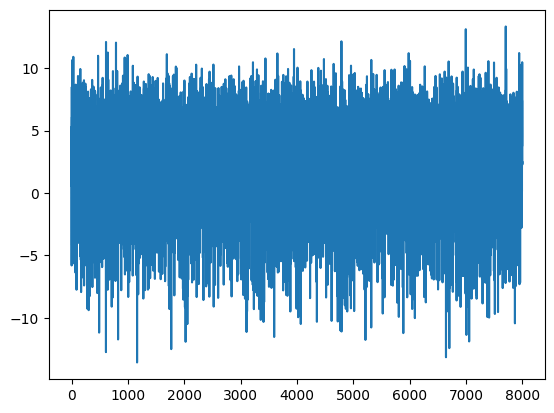

In [9]:
import matplotlib.pyplot as plt
plt.plot(x_val,y_val)

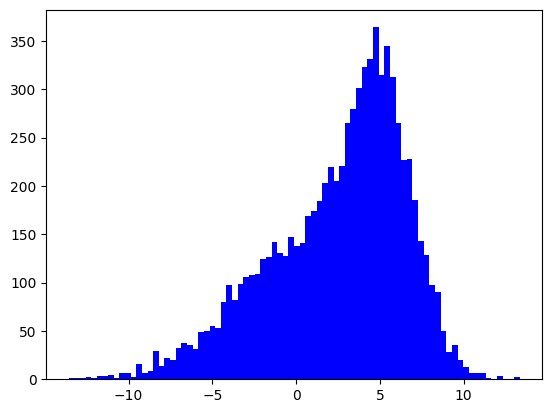

In [10]:
#Plotting the graph for the mixed dataset
counts_1,bins_1,_=plt.hist(y_val,bins=80,color='blue')

### Considering the graph above, it's evident that the point where the graph reaches the maximum and then proceeds to monotonically decrease corresponds to the mean of the distribution  with the higher mean between the two Gaussian distributions.

### We can find the sum of both the means by calculating the mean of the given datapoints and multiplying them by 2. (The sum comes out to be 5.02)

In [11]:

#Finding the greater mean
bin_index=np.argmax(counts_1)
mu_2= (bins_1[bin_index]+bins_1[bin_index+1])/2

#Finding the sum of both the means
sum_means=np.sum(2*y_val)/8000


mu_1=sum_means-mu_2
mu_1=min(mu_1,mu_2)

print('mu_1 =',mu_1,'mu_2 =',mu_2)

mu_1 = 0.2621413648219608 mu_2 = 4.758230395638824


### Therefore, we have obtained the means of both the gaussian distributions:-
### mu_1=0.26 and mu_2=4.76

### For finding the standard deviations we can use the concept of confidence intervals. But we have to make a few assumptions:-
-->All the datapoints lying at right hand tail of the graph belong to the gaussian distribution with the higher mean.

--> All the datapoints lying at left hand tail of the graph belong to the gaussian distribution with the lower mean.

In [12]:
#count_1 represents the number of datapoints lying to the left of -10.
count_1=0
for i in y_val:
    if i<=-10:
        count_1+=1
#Here, we use the confidence interval formula and calculate the z score using the value we obtain from count_1.
sd_1=(10+mu_1)/(stats.norm.ppf(1-count_1/4000))

#count_2 represents the number of datapoints lying to the right of 10.
count_2=0
for i in y_val:
    if i>=10:
        count_2+=1

#Here, we use the confidence interval formula and calculate the z score using the value we obtain from count_2.
sd_2=(10-mu_2)/(stats.norm.ppf(1-count_2/4000))


print('sd_1 =',sd_1,'sd_2 =',sd_2)

sd_1 = 4.1316805843073245 sd_2 = 2.2532183010343503


### Now, we  also have the standard deviations of both the distributions.

### sd_1=4.13 and sd_2=2.25


$D_1 \sim N(0.26,4.13^2)$

$D_2 \sim N(4.76,2.25^2)$


(array([  1.,   1.,   1.,   2.,   1.,   3.,   3.,   4.,   1.,   7.,   6.,
          2.,  16.,   7.,   9.,  29.,  14.,  22.,  20.,  32.,  38.,  35.,
         31.,  49.,  50.,  55.,  53.,  80.,  97.,  82.,  99., 106., 108.,
        109., 124., 126., 142., 131., 127., 147., 138., 141., 169., 174.,
        184., 203., 220., 205., 221., 265., 280., 301., 323., 331., 364.,
        315., 345., 313., 265., 227., 228., 185., 143., 129.,  98.,  90.,
         50.,  28.,  35.,  20.,  13.,   7.,   7.,   7.,   1.,   0.,   3.,
          0.,   0.,   2.]),
 array([-13.58141627, -13.24490899, -12.90840171, -12.57189443,
        -12.23538715, -11.89887988, -11.5623726 , -11.22586532,
        -10.88935804, -10.55285076, -10.21634348,  -9.87983621,
         -9.54332893,  -9.20682165,  -8.87031437,  -8.53380709,
         -8.19729982,  -7.86079254,  -7.52428526,  -7.18777798,
         -6.8512707 ,  -6.51476342,  -6.17825615,  -5.84174887,
         -5.50524159,  -5.16873431,  -4.83222703,  -4.49571976,
      

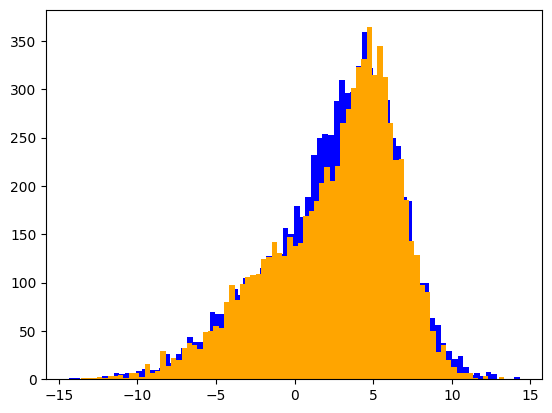

In [18]:
sample_1=np.random.normal(mu_1,sd_1,4000)
sample_2=np.random.normal(mu_2,sd_2,4000)

sample_3=np.append(sample_1,sample_2)


plt.hist(sample_3,bins=80,color='blue')
plt.hist(y_val,bins=80,color='orange')







### The above graph compares the data given in the question with the data generated with the algorithm proposed.
### The given data is in orange and the generated data is in blue.